Epoch 01/10 | loss 1.7322 acc 0.3903 | val 1.6236 acc 0.4298
Epoch 02/10 | loss 1.5015 acc 0.4736 | val 1.4977 acc 0.4810
Epoch 03/10 | loss 1.3970 acc 0.5111 | val 1.4624 acc 0.4878
Epoch 04/10 | loss 1.3195 acc 0.5416 | val 1.4110 acc 0.5050
Epoch 05/10 | loss 1.2548 acc 0.5632 | val 1.4330 acc 0.5100
Epoch 06/10 | loss 1.1933 acc 0.5841 | val 1.4274 acc 0.5080
Epoch 07/10 | loss 1.1431 acc 0.6050 | val 1.3884 acc 0.5234
Epoch 08/10 | loss 1.0901 acc 0.6199 | val 1.4856 acc 0.5070
Epoch 09/10 | loss 1.0436 acc 0.6398 | val 1.4690 acc 0.5080
Epoch 10/10 | loss 0.9969 acc 0.6555 | val 1.3905 acc 0.5362


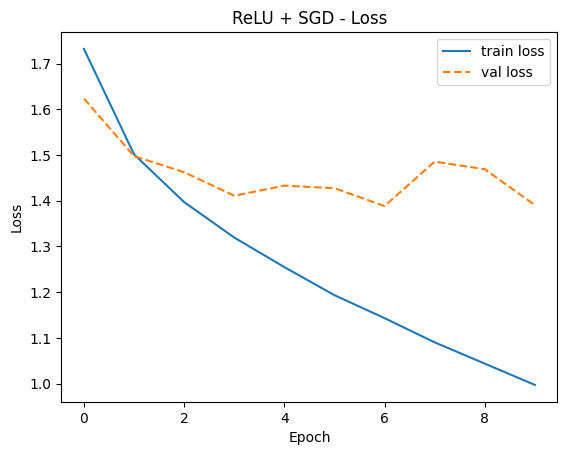

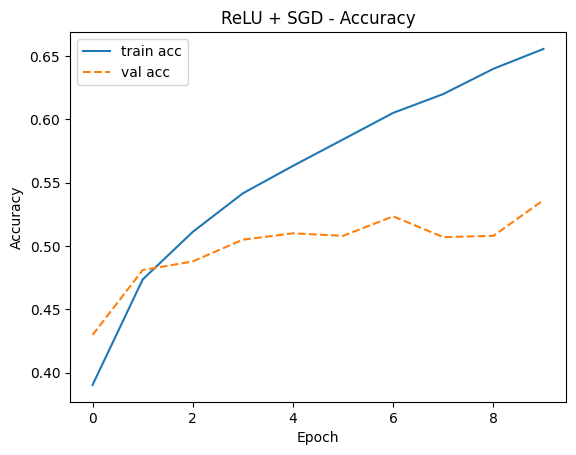

Epoch 01/10 | loss 1.8634 acc 0.3376 | val 1.7656 acc 0.3816
Epoch 02/10 | loss 1.8379 acc 0.3523 | val 1.8667 acc 0.3324
Epoch 03/10 | loss 1.8413 acc 0.3462 | val 1.8564 acc 0.3360
Epoch 04/10 | loss 1.8175 acc 0.3551 | val 1.9046 acc 0.3460
Epoch 05/10 | loss 1.7956 acc 0.3644 | val 1.8417 acc 0.3576
Epoch 06/10 | loss 1.7818 acc 0.3694 | val 1.8543 acc 0.3342
Epoch 07/10 | loss 1.7547 acc 0.3794 | val 1.7892 acc 0.3706
Epoch 08/10 | loss 1.7408 acc 0.3864 | val 1.8262 acc 0.3674
Epoch 09/10 | loss 1.7240 acc 0.3954 | val 1.8146 acc 0.3672
Epoch 10/10 | loss 1.7049 acc 0.4032 | val 1.8525 acc 0.3830


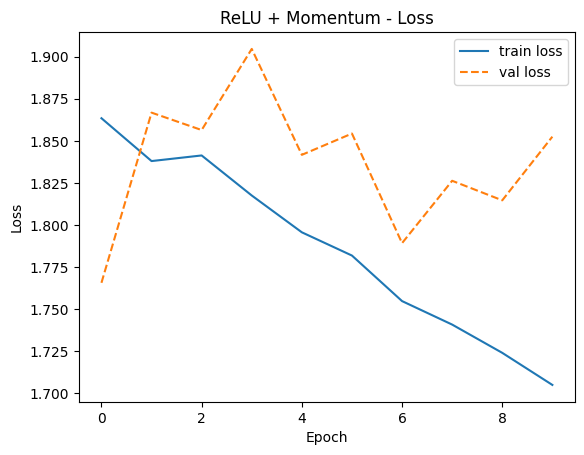

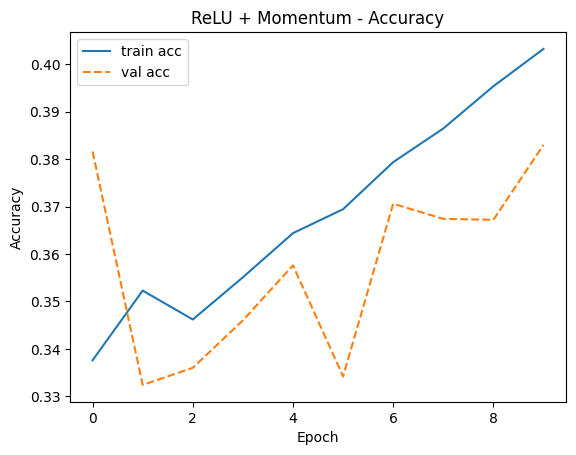

Epoch 01/12 | loss 2.0244 acc 0.3051 | val 1.7946 acc 0.3422
Epoch 02/12 | loss 2.0375 acc 0.3080 | val 1.8434 acc 0.3478
Epoch 03/12 | loss 2.0340 acc 0.3141 | val 1.8735 acc 0.3040
Epoch 04/12 | loss 2.0356 acc 0.3159 | val 1.8074 acc 0.3374
Epoch 05/12 | loss 2.0301 acc 0.3218 | val 1.8061 acc 0.3284
Epoch 06/12 | loss 2.0325 acc 0.3246 | val 1.8211 acc 0.3458
Epoch 07/12 | loss 2.0228 acc 0.3278 | val 1.7742 acc 0.3472
Epoch 08/12 | loss 1.9995 acc 0.3379 | val 1.7906 acc 0.3442
Epoch 09/12 | loss 1.9822 acc 0.3423 | val 1.7441 acc 0.3712
Epoch 10/12 | loss 1.9716 acc 0.3490 | val 1.7509 acc 0.3802
Epoch 11/12 | loss 1.9566 acc 0.3607 | val 1.7313 acc 0.3754
Epoch 12/12 | loss 1.9371 acc 0.3633 | val 1.7064 acc 0.3722


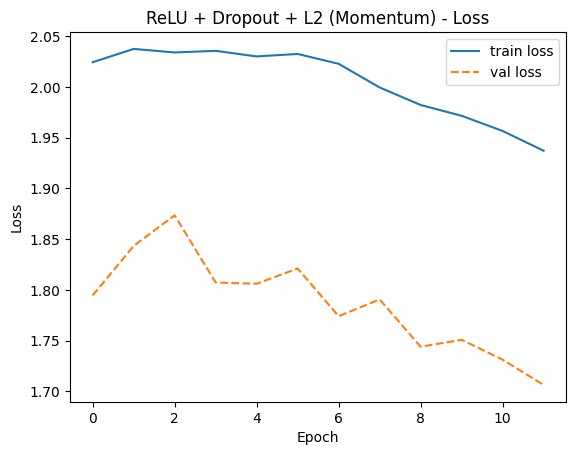

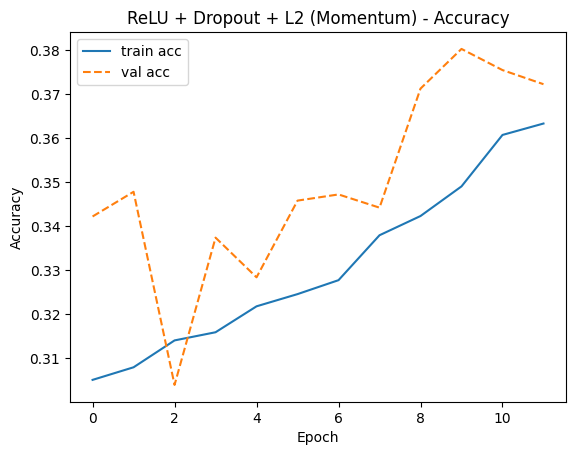

Epoch 01/10 | loss 1.9371 acc 0.2971 | val 1.7449 acc 0.3636
Epoch 02/10 | loss 1.7132 acc 0.3950 | val 1.6427 acc 0.4128
Epoch 03/10 | loss 1.6119 acc 0.4339 | val 1.5943 acc 0.4332
Epoch 04/10 | loss 1.5407 acc 0.4613 | val 1.5378 acc 0.4564
Epoch 05/10 | loss 1.4816 acc 0.4856 | val 1.5088 acc 0.4654
Epoch 06/10 | loss 1.4250 acc 0.5061 | val 1.4856 acc 0.4782
Epoch 07/10 | loss 1.3838 acc 0.5198 | val 1.4715 acc 0.4806
Epoch 08/10 | loss 1.3396 acc 0.5407 | val 1.4395 acc 0.4886
Epoch 09/10 | loss 1.2944 acc 0.5564 | val 1.4503 acc 0.4822
Epoch 10/10 | loss 1.2512 acc 0.5719 | val 1.4698 acc 0.4888


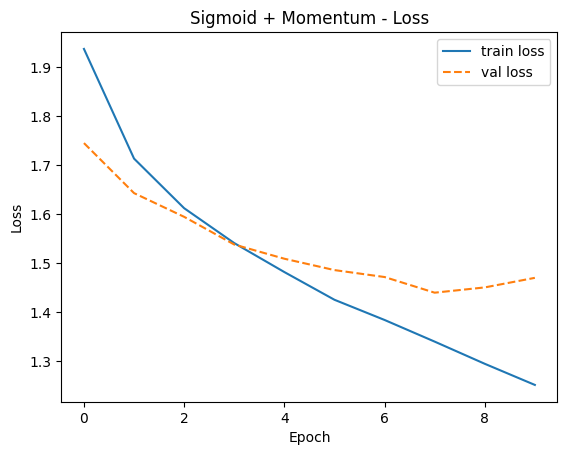

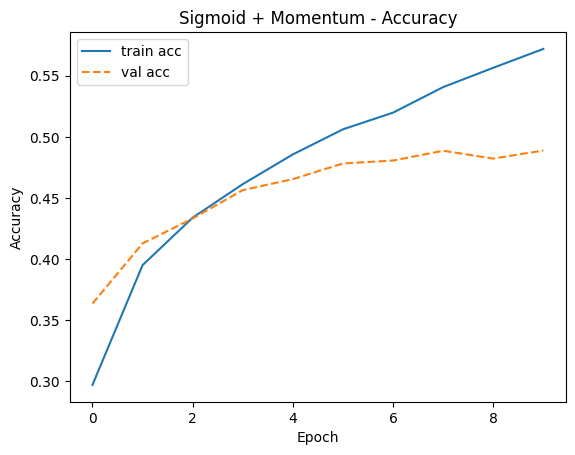

Best by validation: ReLU_SGD
Test accuracy: 0.5243


In [ ]:
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Weight init 

def truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def init_trunc(shape, fan_in, rng):
    rad = 1.0 / np.sqrt(fan_in)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    return X.rvs(shape, random_state=rng).astype(np.float32)


# Activations (forward + backward)

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def d_sigmoid(sigmoid_out):
    return sigmoid_out * (1.0 - sigmoid_out)

def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return (x > 0).astype(np.float32)


# Softmax (forward + backward)
def softmax(logits):
    # stable softmax: subtract row max
    z = logits - np.max(logits, axis=1, keepdims=True)
    expz = np.exp(z).astype(np.float32)
    return expz / np.sum(expz, axis=1, keepdims=True)

def softmax_backward(dy, y):
   
    s = np.sum(dy * y, axis=1, keepdims=True)
    return y * (dy - s)


# Loss: cross entropy

def cross_entropy(probs, y_onehot, eps=1e-12):
    p = np.clip(probs, eps, 1.0)
    return -np.sum(y_onehot * np.log(p)) / probs.shape[0]

def grad_softmax_cross_entropy(probs, y_onehot):
   
    return (probs - y_onehot) / probs.shape[0]


# Dropout (inverted)

def dropout_forward(x, drop_prob, rng, train=True):
    if (not train) or drop_prob == 0.0:
        return x, None
    keep_prob = 1.0 - drop_prob
    mask = (rng.random(x.shape) < keep_prob).astype(np.float32) / keep_prob
    return x * mask, mask

def dropout_backward(dout, mask):
    if mask is None:
        return dout
    return dout * mask


# One-hot helper

def one_hot(y, num_classes=10):
    y = y.reshape(-1)
    out = np.zeros((y.size, num_classes), dtype=np.float32)
    out[np.arange(y.size), y] = 1.0
    return out

def accuracy(probs, y_int):
    return (np.argmax(probs, axis=1) == y_int.reshape(-1)).mean()


# Optimizers 

class SGD:
    def __init__(self, lr=0.1):
        self.lr = lr
    def step(self, params, grads):
        for k in params:
            params[k] -= self.lr * grads[k]

class SGDMomentum:
    def __init__(self, lr=0.1, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = {}
    def step(self, params, grads):
        for k in params:
            if k not in self.v:
                self.v[k] = np.zeros_like(params[k])
            self.v[k] = self.momentum * self.v[k] - self.lr * grads[k]
            params[k] += self.v[k]


#Neural Network (MLP)
class NeuralNetwork:
   
    def __init__(self,
                 layer_sizes,
                 activations,
                 learning_rate=0.1,
                 dropout_probs=None,
                 reg=None,
                 reg_lambda=0.0,
                 optimizer="sgd",
                 momentum=0.9,
                 seed=42):
        assert len(layer_sizes) >= 2
        assert len(activations) == len(layer_sizes) - 2  # hidden layers only
        self.layer_sizes = layer_sizes
        self.activations = activations
        self.lr = learning_rate
        self.dropout_probs = dropout_probs if dropout_probs is not None else [0.0] * (len(layer_sizes) - 2)
        assert len(self.dropout_probs) == len(layer_sizes) - 2
        self.reg = reg
        self.reg_lambda = reg_lambda
        self.rng = np.random.default_rng(seed)

        # params: 
        self.params = {}
        self._init_weights()

        # optimizer
        if optimizer.lower() == "sgd":
            self.opt = SGD(lr=self.lr)
        elif optimizer.lower() in ["momentum", "sgd_momentum", "sgdmomentum"]:
            self.opt = SGDMomentum(lr=self.lr, momentum=momentum)
      

    def _init_weights(self):
        for i in range(1, len(self.layer_sizes)):
            fan_in = self.layer_sizes[i-1]
            fan_out = self.layer_sizes[i]
            self.params[f"W{i}"] = init_trunc((fan_in, fan_out), fan_in, self.rng)
            self.params[f"b{i}"] = np.zeros((1, fan_out), dtype=np.float32)

    def _act_forward(self, x, act_name):
        if act_name == "relu":
            return relu(x)
        elif act_name == "sigmoid":
            return sigmoid(x)
       

    def _act_backward(self, preact, act_out, act_name, dout):
        if act_name == "relu":
            return dout * d_relu(preact)
        elif act_name == "sigmoid":
            return dout * d_sigmoid(act_out)
       

    def forward(self, X, train=True):

        cache = {}
        A = X

        num_layers = len(self.layer_sizes) - 1
        # hidden layers
        for i in range(1, num_layers):
            W = self.params[f"W{i}"]
            b = self.params[f"b{i}"]
            Z = A @ W + b  # pre-activation
            H = self._act_forward(Z, self.activations[i-1])

            # dropout
            H_drop, mask = dropout_forward(H, self.dropout_probs[i-1], self.rng, train=train)

            cache[f"A{i-1}"] = A
            cache[f"Z{i}"] = Z
            cache[f"H{i}"] = H
            cache[f"mask{i}"] = mask
            A = H_drop

        # output layer
        W = self.params[f"W{num_layers}"]
        b = self.params[f"b{num_layers}"]
        logits = A @ W + b
        probs = softmax(logits)

        cache[f"A{num_layers-1}"] = A
        cache["logits"] = logits
        cache["probs"] = probs
        return probs, cache

    def reg_loss_and_grads(self, grads):
      
        if self.reg is None or self.reg_lambda == 0.0:
            return 0.0

        reg_loss = 0.0
        num_layers = len(self.layer_sizes) - 1
        for i in range(1, num_layers + 1):
            W = self.params[f"W{i}"]
            if self.reg == "l2":
                reg_loss += 0.5 * self.reg_lambda * np.sum(W * W)
                grads[f"W{i}"] += self.reg_lambda * W
            elif self.reg == "l1":
                reg_loss += self.reg_lambda * np.sum(np.abs(W))
                grads[f"W{i}"] += self.reg_lambda * np.sign(W)
            else:
                raise ValueError("reg must be None, 'l1', or 'l2'")
        return reg_loss

    def backward(self, y_onehot, cache):
    
        grads = {}
        probs = cache["probs"]
        dlogits = grad_softmax_cross_entropy(probs, y_onehot)

        num_layers = len(self.layer_sizes) - 1

        # output layer grads
        A_prev = cache[f"A{num_layers-1}"]
        grads[f"W{num_layers}"] = A_prev.T @ dlogits
        grads[f"b{num_layers}"] = np.sum(dlogits, axis=0, keepdims=True)
        dA = dlogits @ self.params[f"W{num_layers}"].T

        # hidden layers backward
        for i in range(num_layers-1, 0, -1):
            # dropout backward
            mask = cache[f"mask{i}"]
            dA = dropout_backward(dA, mask)

            Z = cache[f"Z{i}"]
            H = cache[f"H{i}"]
            A_prev = cache[f"A{i-1}"]

            dZ = self._act_backward(Z, H, self.activations[i-1], dA)
            grads[f"W{i}"] = A_prev.T @ dZ
            grads[f"b{i}"] = np.sum(dZ, axis=0, keepdims=True)
            dA = dZ @ self.params[f"W{i}"].T

        # add reg
        reg_loss = self.reg_loss_and_grads(grads)
        return grads, reg_loss

    def train(self, X_train, y_train_onehot, X_val=None, y_val_onehot=None,
              y_train_int=None, y_val_int=None,
              epochs=20, batch_size=128, lr_decay=1.0, verbose=True):
   
        N = X_train.shape[0]
        history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

        for ep in range(1, epochs+1):
            # LR decay
            self.opt.lr *= lr_decay

            idx = self.rng.permutation(N)
            Xs = X_train[idx]
            Ys = y_train_onehot[idx]

            batch_losses = []
            batch_accs = []

            for start in range(0, N, batch_size):
                xb = Xs[start:start+batch_size]
                yb = Ys[start:start+batch_size]

                probs, cache = self.forward(xb, train=True)
                data_loss = cross_entropy(probs, yb)
                grads, reg_loss = self.backward(yb, cache)
                loss = data_loss + reg_loss

                self.opt.step(self.params, grads)

                batch_losses.append(loss)
                if y_train_int is not None:
                    batch_accs.append(accuracy(probs, y_train_int[idx][start:start+batch_size]))

            train_loss = float(np.mean(batch_losses))
            history["train_loss"].append(train_loss)

            if y_train_int is not None and len(batch_accs) > 0:
                train_acc = float(np.mean(batch_accs))
            else:
                train_acc = np.nan
            history["train_acc"].append(train_acc)

            if X_val is not None and y_val_onehot is not None and y_val_int is not None:
                val_probs, _ = self.forward(X_val, train=False)
                val_loss = float(cross_entropy(val_probs, y_val_onehot))
                val_acc = float(accuracy(val_probs, y_val_int))
                history["val_loss"].append(val_loss)
                history["val_acc"].append(val_acc)
                if verbose:
                    print(f"Epoch {ep:02d}/{epochs} | loss {train_loss:.4f} acc {train_acc:.4f} | val {val_loss:.4f} acc {val_acc:.4f}")
            else:
                if verbose:
                    print(f"Epoch {ep:02d}/{epochs} | loss {train_loss:.4f} acc {train_acc:.4f}")

        return history

    def run(self, X):
        probs, _ = self.forward(X, train=False)
        return probs



# CIFAR-10 loading + preprocessing

cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype(np.float32) / 255.0
X_test  = X_test.astype(np.float32) / 255.0

# standardize (helps)
mean = X_train.mean(axis=(0,1,2), keepdims=True)
std  = X_train.std(axis=(0,1,2), keepdims=True) + 1e-7
X_train = (X_train - mean) / std
X_test  = (X_test - mean) / std

# flatten to vectors (FC network)
X_train = X_train.reshape(X_train.shape[0], -1)  # (50000, 3072)
X_test  = X_test.reshape(X_test.shape[0], -1)    # (10000, 3072)

y_train_int = y_train.reshape(-1)
y_test_int  = y_test.reshape(-1)

Y_train = one_hot(y_train_int, 10)
Y_test  = one_hot(y_test_int, 10)

# simple val split
val_size = 5000
X_val, Y_val, y_val_int = X_train[:val_size], Y_train[:val_size], y_train_int[:val_size]
X_tr,  Y_tr,  y_tr_int  = X_train[val_size:], Y_train[val_size:], y_train_int[val_size:]


# Experiments: optimizer/activation/dropout/reg comparison
def plot_history(hist, title):
    plt.figure()
    plt.plot(hist["train_loss"], label="train loss")
    if len(hist["val_loss"]) > 0:
        plt.plot(hist["val_loss"], label="val loss", linestyle="--")
    plt.title(title + " - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(hist["train_acc"], label="train acc")
    if len(hist["val_acc"]) > 0:
        plt.plot(hist["val_acc"], label="val acc", linestyle="--")
    plt.title(title + " - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


# 1) ReLU + SGD
nn1 = NeuralNetwork(
    layer_sizes=[3072, 256, 128, 10],
    activations=["relu", "relu"],
    learning_rate=0.08,
    dropout_probs=[0.0, 0.0],
    reg="l2", reg_lambda=1e-4,
    optimizer="sgd",
    seed=1
)
h1 = nn1.train(X_tr, Y_tr, X_val, Y_val, y_tr_int, y_val_int,
               epochs=10, batch_size=128, lr_decay=0.98)
plot_history(h1, "ReLU + SGD")


# 2) ReLU + Momentum
nn2 = NeuralNetwork(
    layer_sizes=[3072, 256, 128, 10],
    activations=["relu", "relu"],
    learning_rate=0.08,
    dropout_probs=[0.0, 0.0],
    reg="l2", reg_lambda=1e-4,
    optimizer="momentum", momentum=0.9,
    seed=1
)
h2 = nn2.train(X_tr, Y_tr, X_val, Y_val, y_tr_int, y_val_int,
               epochs=10, batch_size=128, lr_decay=0.98)
plot_history(h2, "ReLU + Momentum")


# 3) ReLU + Dropout + L2
nn3 = NeuralNetwork(
    layer_sizes=[3072, 512, 256, 10],
    activations=["relu", "relu"],
    learning_rate=0.06,
    dropout_probs=[0.3, 0.3],     # inverted dropout
    reg="l2", reg_lambda=5e-4,
    optimizer="momentum", momentum=0.9,
    seed=2
)
h3 = nn3.train(X_tr, Y_tr, X_val, Y_val, y_tr_int, y_val_int,
               epochs=12, batch_size=128, lr_decay=0.98)
plot_history(h3, "ReLU + Dropout + L2 (Momentum)")


# 4) Sigmoid (comparison)
nn4 = NeuralNetwork(
    layer_sizes=[3072, 256, 128, 10],
    activations=["sigmoid", "sigmoid"],
    learning_rate=0.05,
    dropout_probs=[0.0, 0.0],
    reg="l2", reg_lambda=1e-4,
    optimizer="momentum", momentum=0.9,
    seed=3
)
h4 = nn4.train(X_tr, Y_tr, X_val, Y_val, y_tr_int, y_val_int,
               epochs=10, batch_size=128, lr_decay=0.99)
plot_history(h4, "Sigmoid + Momentum")



# Test evaluation 

models = {"ReLU_SGD": (nn1, h1), "ReLU_Momentum": (nn2, h2),
          "ReLU_Dropout_L2": (nn3, h3), "Sigmoid_Momentum": (nn4, h4)}

best_name = max(models.keys(), key=lambda k: max(models[k][1]["val_acc"]))
best_model = models[best_name][0]
print("Best by validation:", best_name)

test_probs = best_model.run(X_test)
print("Test accuracy:", accuracy(test_probs, y_test_int))
